# Линейные модели

## sklearn.linear_model

**linear_model:**
* RidgeClassifier
* SGDClassifier
* SGDRegressor
* LinearRegression
* LogisticRegression
* Lasso
* etc

документация: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model

примеры: http://scikit-learn.org/stable/modules/linear_model.html#linear-model

## Общий алгоритм решения задачи машинного обучения:

0. Формулируем задачу и определяем целевые метрики
1. Готовим размеченные данные
2. Разбиваем данные на обучающую и тестовую выборки
3. Выбираем подходящий алгоритм и обучаем модель
4. Оцениваем качество модели



In [ ]:
from sklearn import model_selection, datasets, linear_model, metrics

import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
sns.set();

In [ ]:
import warnings
warnings.simplefilter("ignore")

In [ ]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
# вспомогательная функция для отрисовки картинок
# понимать, что в ней написано, совсем необязательно

def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

## Будем решать задачу бинарной классификации на синтетически сгенерированных данных

### 1. Подготовка данных

In [ ]:
# генерируем 2 облака с заданным разбросом
blobs = datasets.make_blobs(centers=2, cluster_std=3)

In [ ]:
blobs[0].shape, blobs[1].shape

((100, 2), (100,))

In [ ]:
df = pd.DataFrame(blobs[0], columns=['feature_1', 'feature_2'])
df['target'] = blobs[1]

In [ ]:
df.head()

,feature_1,feature_2,target
0,5.444770,3.551582,1
1,11.271463,-1.421440,1
2,9.134435,-1.900305,1
3,3.448816,-8.165052,0
4,9.742270,-7.883689,0


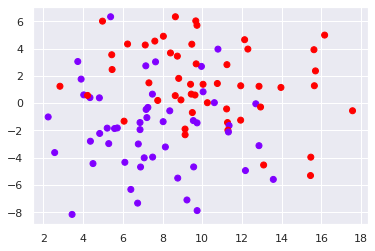

In [ ]:
plt.scatter(x=df['feature_1'], y=df['feature_2'], c=df['target'], cmap='rainbow')

### 2. Разбиение данных на обучающую и тестовую выборки

Разбейте данные на ```train``` и ```test``` с помощью функции ```model_selection.train_test_split()```.
В обучающую выборку поместите 70% данных

In [ ]:
from sklearn.model_selection import train_test_split
a = df.values
X=a[:, :2]
y=a[:, 2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


### Линейная классификация

Курсив#### LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
log_regressor = LogisticRegression(random_state=0)

### 3. Обучение модели

Вызовите у классификатора метод ```.fit()```, передав в метод обучающие данные

In [ ]:
log_regressor.fit(X_train, y_train)

LogisticRegression(random_state=0)

Применение обученного классификатора

Вызовите у классификатора метод ```.predict()```, передав в метод тестовые данные

In [ ]:
# -- НАПИШИТЕ ВАШ КОД ЗДЕСЬ --
logreg_predictions = log_regressor.predict(X_test)

In [ ]:
logreg_predictions

array([0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1.,
       1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.])

In [ ]:
y_test

array([1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.])

In [ ]:
log_regressor.score(X_test, y_test)

0.7666666666666667

In [ ]:
np.mean(logreg_predictions == y_test)

0.7666666666666667

Логистическая регрессия умеет оценивать вероятность принадлежности объекта к классам классификации.
Вызовите у классификатора метод ```.predict_proba()```, передав в метод тестовые данные

In [ ]:
# proba = probabilities = вероятности

# -- НАПИШИТЕ ВАШ КОД ЗДЕСЬ --
logreg_predictions2 = log_regressor.predict_proba(X_test)
logreg_predictions2

array([[0.54463767, 0.45536233],
       [0.97941266, 0.02058734],
       [0.20758798, 0.79241202],
       [0.05216274, 0.94783726],
       [0.07829089, 0.92170911],
       [0.35737897, 0.64262103],
       [0.88871714, 0.11128286],
       [0.00584212, 0.99415788],
       [0.50244419, 0.49755581],
       [0.02451781, 0.97548219],
       [0.91521841, 0.08478159],
       [0.29437094, 0.70562906],
       [0.71482734, 0.28517266],
       [0.97913438, 0.02086562],
       [0.11672267, 0.88327733],
       [0.81843142, 0.18156858],
       [0.09524552, 0.90475448],
       [0.1442781 , 0.8557219 ],
       [0.12723197, 0.87276803],
       [0.77846328, 0.22153672],
       [0.72593803, 0.27406197],
       [0.92218864, 0.07781136],
       [0.50772593, 0.49227407],
       [0.45309754, 0.54690246],
       [0.92993442, 0.07006558],
       [0.1826182 , 0.8173818 ],
       [0.97298129, 0.02701871],
       [0.78049957, 0.21950043],
       [0.72591475, 0.27408525],
       [0.54114391, 0.45885609]])

### 4. Оценка качества модели

Посчитайте ```accuracy score``` модели на тестовых данных с помощью функции ```metrics.accuracy_score()```, передав в функцию настоящие и предсказанные метки

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,logreg_predictions)


0.7666666666666667

### Как затем использовать эту модель, обученную в jupyter ноутбуке?

$$
f(x) = sigmoid(w_0 + w_1 * x_1 + w_2 * x_2)
$$
$w_0, w_1$ и $w_2$ находим с помощью обучения модели

In [ ]:
print('Intercept', log_regressor.intercept_) # w_o
print('Coefficient', log_regressor.coef_) # w_1 and w_2

Intercept [-2.98122841]
Coefficient [[0.35044547 0.49158037]]


#### Наглядная визуализация логистической регрессии: https://florianhartl.com/logistic-regression-geometric-intuition.html

####  Нарисуем границу принятия решения нашим классификатором

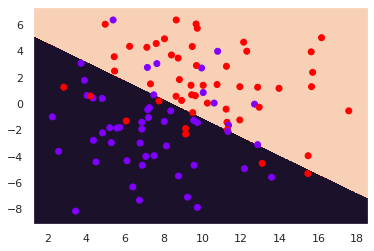

In [ ]:
xx, yy = make_meshgrid(blobs[0][:, 0], blobs[0][:, 1])
fig, sub = plt.subplots()
plot_contours(sub, log_regressor, xx, yy)
plt.scatter(x=df['feature_1'], y=df['feature_2'], c=df['target'], cmap='rainbow')

### Оценка качества модели по кросс-валидации

#### cross_val_score

Посчитайте качество модели на кросс-валидации по 10 фолдам (параметр ```cv```) c метрикой ```accuracy``` (параметр ```scoring```) с помощью функции ```model_selection.cross_val_score```


In [ ]:
# -- НАПИШИТЕ ВАШ КОД ЗДЕСЬ --
logreg_scoring = model_selection.cross_val_score(log_regressor, X_test, y_test, cv=10)
logreg_scoring

array([1.        , 1.        , 0.66666667, 0.66666667, 0.33333333,
       0.66666667, 0.66666667, 0.66666667, 1.        , 0.66666667])

In [ ]:
print('Log mean:{}, max:{}, min:{}, std:{}'.format(logreg_scoring.mean(),
                                                   logreg_scoring.max(),
                                                   logreg_scoring.min(),
                                                   logreg_scoring.std()))

Log mean:0.7333333333333333, max:1.0, min:0.3333333333333333, std:0.2


In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [ ]:
def cost(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    return np.sum(first - second) / (len(X))

In [ ]:
## Добавим столбец с единичками - это упростит умножение матриц
df.insert(0, 'Ones', 1)

cols = df.shape[1]
X = df.iloc[:,0:cols-1]  # обучающие данные
y = df.iloc[:,cols-1:cols] # целевая переменная

X = np.array(X.values)  # пребразуем в массив датафрейм
y = np.array(y.values)
theta = np.zeros(3)  #  создадим массив тетта с нулями

In [ ]:
X.shape, theta.shape, y.shape

((100, 3), (3,), (100, 1))

In [ ]:
cost(theta, X, y)

0.6931471805599453

In [ ]:
def gradient(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)

    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)

    error = sigmoid(X * theta.T) - y

    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        grad[i] = np.sum(term) / len(X)

    return grad

In [ ]:
import scipy.optimize as opt
result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(X, y))
cost(result[0], X, y)

0.4432837117709144

In [ ]:
def predict(theta, X):
    probability = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]

In [ ]:
theta_min = np.matrix(result[0])
predictions = predict(theta_min, X)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
s = 0
for i in correct:
  s+=(i/len(correct))
print('accuracy = {0}%'.format(int(s*100)))

accuracy = 81%
